In [1]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

Input Data and Shape
(200, 5)


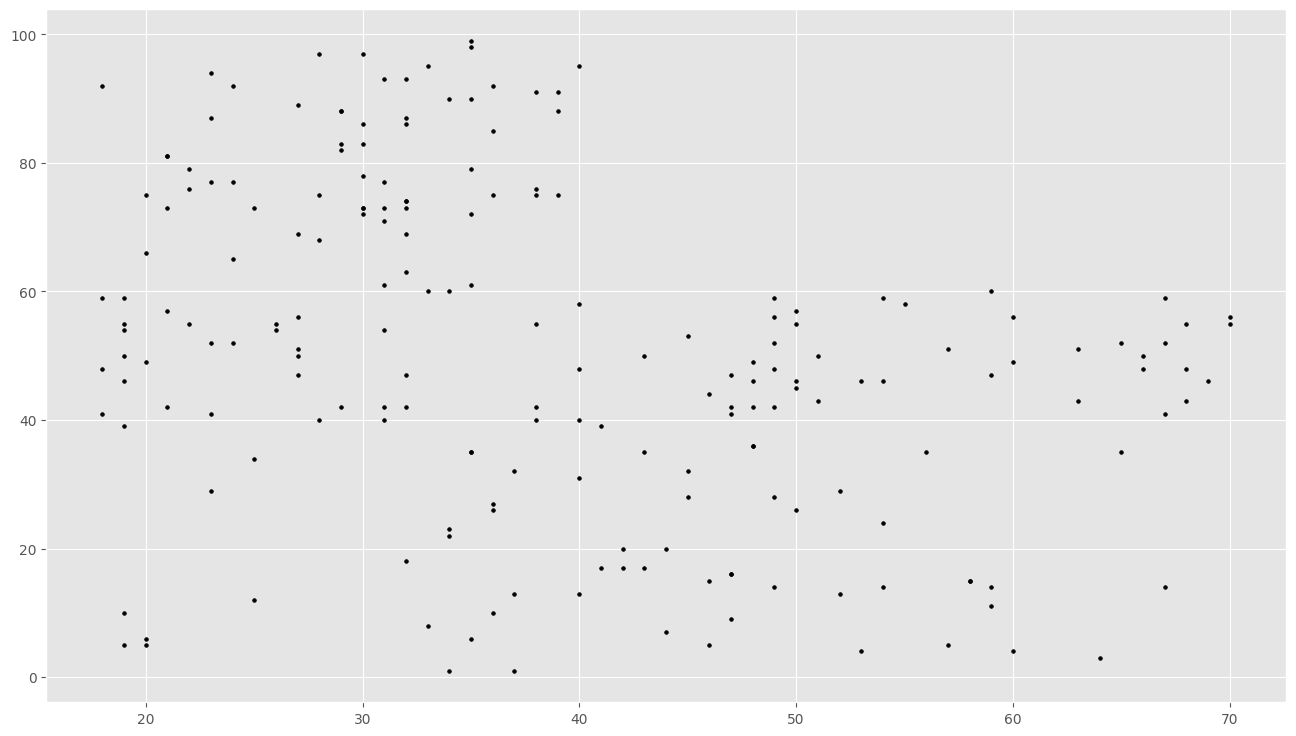

In [37]:
# Importing the dataset
data = pd.read_csv('/content/Mall_Customers.csv')
print("Input Data and Shape")
print(data.shape)
data.head()

# Getting the values and plotting it
f1 = data[ 'Age'].values
f2 = data['Spending Score (1-100)'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)



Initial Centroids
[[85.       43.047176]
 [42.        9.731048]
 [37.       21.220871]
 [22.       89.5166  ]]


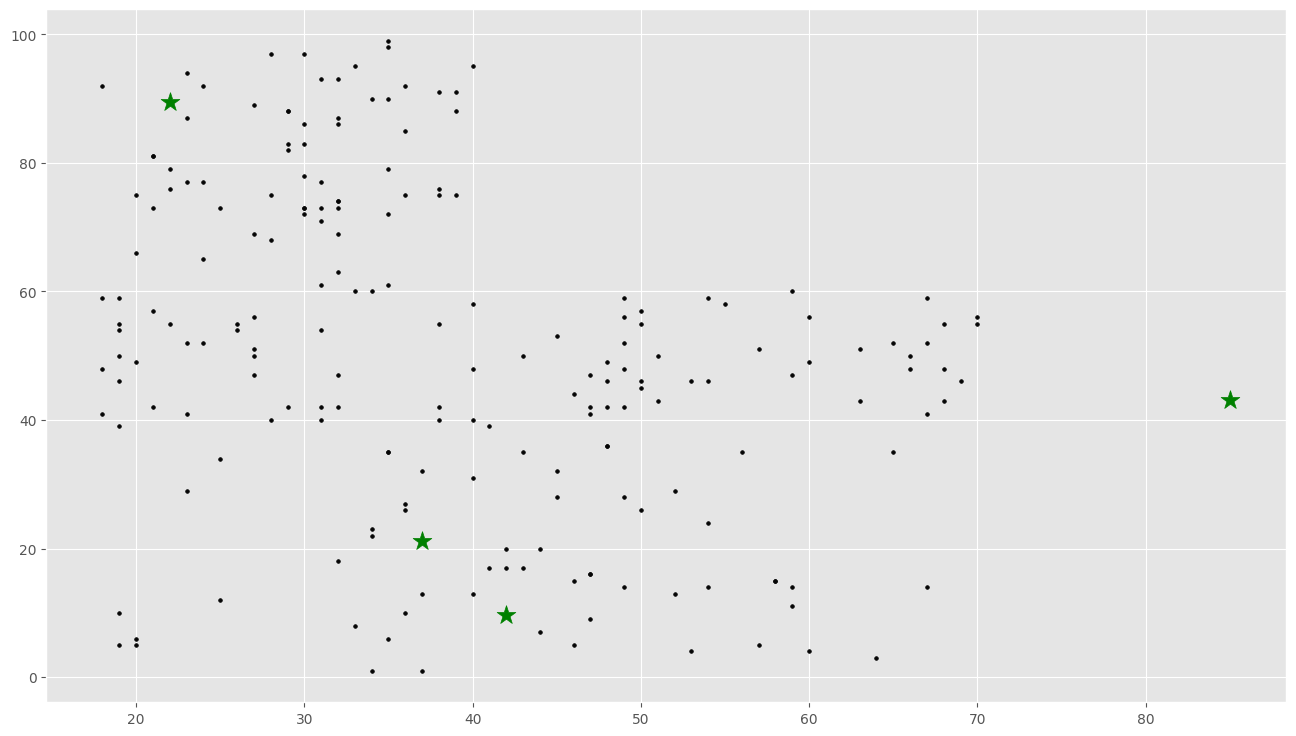

In [63]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# Number of clusters
k = 4
# X coordinates of random centroids
C_x = np.random.randint(np.min(X), np.max(X), size=k)
# Y coordinates of random centroids
C_y = np.random.uniform(0.0, np.max(f2), size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Initial Centroids")
print(C)

# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [64]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

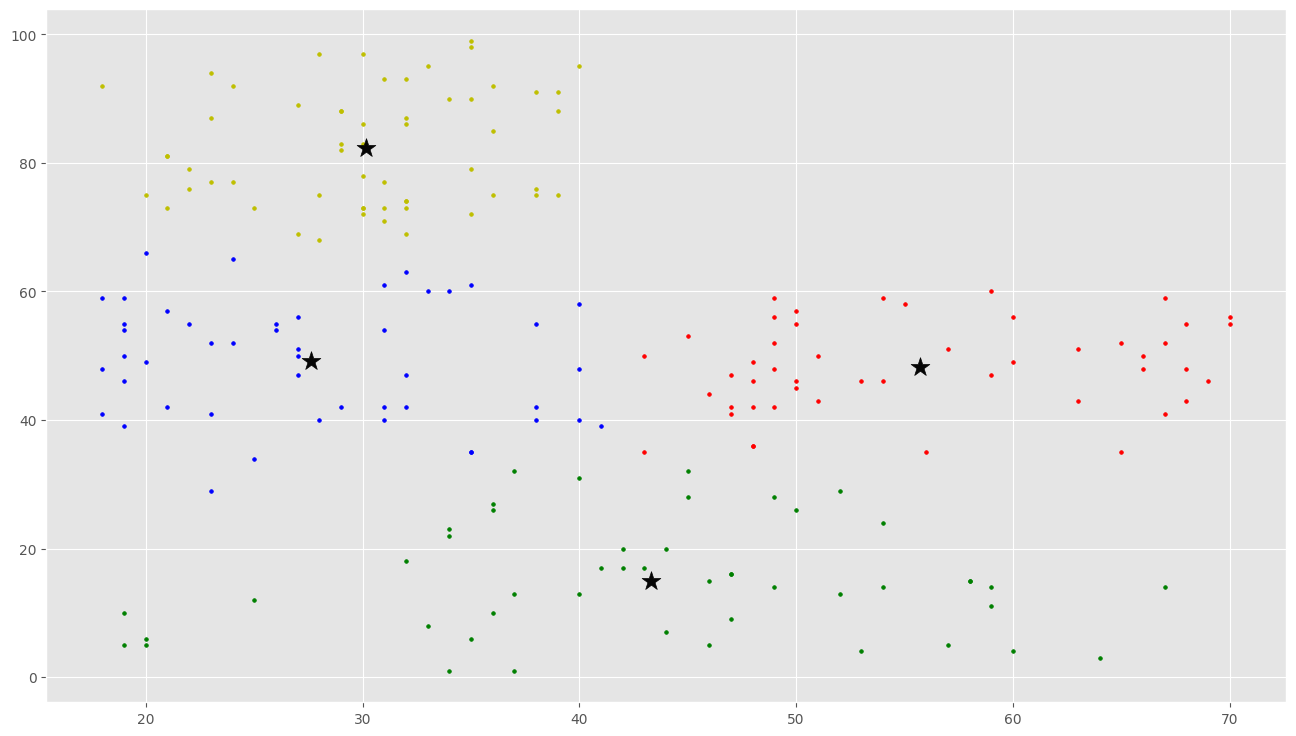

In [65]:
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'gray', 'orange', 'purple']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        if len(points) > 0:
          ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')